Variance of Reparameterization Estimator: 0.2154129147529602
Variance of Score Function Estimator: 1.1996333599090576
Variance of REINFORCE Estimator: 0.4222812056541443


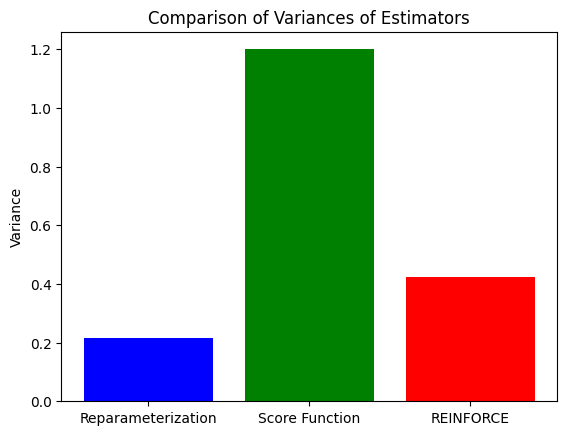

In [4]:
import torch
import torch.distributions as dist
import numpy as np
import matplotlib.pyplot as plt


N = 1000
mu = torch.tensor(0.5)
m = torch.tensor(1.0)


def f(z):
    return m * z


y_plus = dist.Weibull(1.0, 2.0).sample((N,))
y_minus = dist.Weibull(1.0, 2.0).sample((N,))


reparameterization_estimator = torch.mean(f(mu + y_plus))

normal_dist = dist.Normal(mu, 1.0)
log_prob_values = normal_dist.log_prob(y_plus)
log_prob_values = torch.clamp(log_prob_values, min=-10, max=10)

score_function_estimator = torch.mean(f(mu + y_plus) * log_prob_values)


reinforce_estimator = torch.mean(m * (f(mu + y_plus) - f(mu - y_minus)))


var_reparameterization = torch.var(f(mu + y_plus))
var_score_function = torch.var(f(mu + y_plus) * log_prob_values)
var_reinforce = torch.var(m * (f(mu + y_plus) - f(mu - y_minus)))


print("Variance of Reparameterization Estimator:", var_reparameterization.item())
print("Variance of Score Function Estimator:", var_score_function.item())
print("Variance of REINFORCE Estimator:", var_reinforce.item())


labels = ['Reparameterization', 'Score Function', 'REINFORCE']
variances = [var_reparameterization.item(), var_score_function.item(), var_reinforce.item()]

plt.bar(labels, variances, color=['blue', 'green', 'red'])
plt.ylabel('Variance')
plt.title('Comparison of Variances of Estimators')
plt.show()


گر واریانس برآوردگر η کمتر باشد، نشان‌دهنده‌ی دقت بالاتر و کارایی بهتر در محاسبه‌ی گرادیان است.
مقایسه‌ی مقادیر واریانس برای برآوردگرهای مختلف به ما این امکان را می‌دهد که مناسب‌ترین روش را برای مسائل خاص انتخاب کنیم.
طبق نمودار ترسیم شده reparametrization بهتر از همه عملکرده است.